In [1]:
import numpy as np
from scipy.linalg import sqrtm, eigh
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal
from scipy.integrate import quad

## Exercise 5-1: Compare isotropic model and anistropic model

Draw covariance contours

In [2]:
class Mysimulator: 
    def __init__(self,x_min=0, y_min=0, x_max=100, y_max=100, n=500,
                theta=3, range_val1=2, range_val2=4):
        self.x_min = x_min
        self.y_min = y_min
        self.x_max = x_max
        self.y_max = y_max
        self.n = n
        self.theta = theta
        self.range_val1 = range_val1
        self.range_val2 = range_val2
    
    def generate_grid(self):
        x = np.linspace(self.x_min, self.x_max, self.n)
        y = np.linspace(self.y_min, self.y_max, self.n)
        X, Y = np.meshgrid(x,y)
        d1 = np.sqrt((x[0] - x)**2)
        d2 = np.sqrt((y[0] - y)**2)
        D1, D2 = np.meshgrid(d1, d2)

        return X,Y,D1,D2
    
    def gau_kernel(self, x, y, sx, sy):
        # return np.exp(-((x**2) / (sx**2) + (y**2) / (sy**2))) 
        return np.exp(-((x**2) / (sx**2) + (y**2) / (sy**2))) 

    def plot_contour(self, X, Y, Z):
        plt.contour(X, Y, Z, cmap='viridis')
        plt.title('Gaussian Kernel Contour Plot')
        plt.xlabel('X-axis distance')
        plt.ylabel('Y-axis distance')
        plt.colorbar()
        plt.show()

    def run_simulation(self):
        X, Y, D1, D2 = self.generate_grid()

    # Create an instance of the AnisotropicGaussian class
        Z = self.gau_kernel(D1, D2, self.range_val1, self.range_val2)

    # Create Contour Plot
        self.plot_contour(D1, D2, Z)
       

### 

Aniostropic Gaussian kernel  

$k(d1,d2)=\exp(- ( ( \frac{d_1}{range_1})^2 + ( \frac{d_2}{range_2})^2 )),$

where $d_1$ is x_axis distance and $d_2$ is y_axis distance, and 
range_1 = 1, range_2 = 3 are set to be different

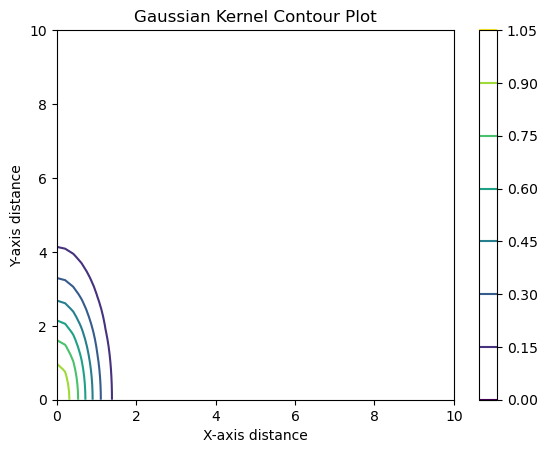

In [3]:
simulator = Mysimulator(x_min=0, y_min=0, x_max=10, y_max=10,
                        n=50, theta=3, range_val1=1, range_val2=3)
simulator.run_simulation()

Iostropic Gaussian kernel

range_1 = range_2 = 1.

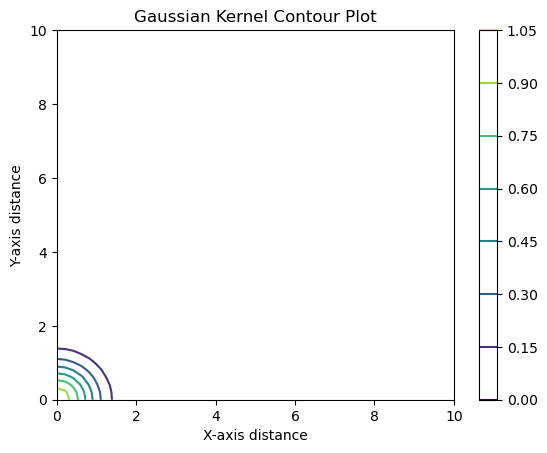

In [4]:
simulator = Mysimulator(x_min=0, y_min=0, x_max=10, y_max=10,
                        n=50, theta=3, range_val1=1, range_val2=1)
simulator.run_simulation()

## Exercise 5-2. 

Observe $\biggl| \sum_j v_{jk} e^{i \omega x_j} -e^{i \omega x_o}  \biggr|^2$ as $x_o$ varies. If $x_0$ is located at boundary or outside of the region, we are doing extrapolation, otherwise interpolation. 

It seems interpolation is more stable.

$||Z_0 - (c_1 Z_1 + \cdots c_p Z_p)||^2$  
$=\langle     Z_0 - C^\top Z,  Z_0 - C^\top Z \rangle $  
$=cov(  Z_0 - C^\top Z,  Z_0 - C^\top Z )= ||e^{iwx_0}- \sum_{j}C_{jk}e^{iw x_j}||_f^2.$

For BLP,  

$\argmin_c  cov(  Z_0 - C^\top Z,  Z_0 - C^\top Z )  
 = \hat{C}= \Gamma^{-1} \gamma.$ 

Now, for BLUP, (if a process is mean zero BLUP is same as BLP)

$\argmin_c  cov(  Z_0 - C^\top Z,  Z_0 - C^\top Z )$ subject to $\lambda \mathbf{E} (Z_0- C^\top Z)$  
$  \argmin_c  cov(  Z_0 - C^\top Z,  Z_0 - C^\top Z ) + \lambda(\mathbf{E} (Z_0- C^\top Z)  )$  
can be obtained by setting derivative equal to zero:
$-2 \gamma_{p-1} + 2 \Gamma_{p-1} \hat{C} - \mathbf{E}\lambda Z = 0$ gives  
$\hat{C} = \Gamma_{p-1}^{-1} \frac{ 2 \gamma_{p-1}+ \mathbf{E} \lambda Z}{2}.$

Example: 

Given n=200

Extrapolation: let $x_0$ = x[0]  
Interpolation: let $x_0$ = x[100]

In [6]:
def test2(cov_index=0,j=100, x_min=0, x_max=1, theta=4, range_val = 3, n=200):

    # Specify the number of points along each axis
    # num_points_x, num_points_y = n, n
    num_points_x = n


    # Generate a regular grid using linspace
    x = np.linspace(x_min, x_max, num_points_x) 
    # x = 0:n/n
    d = np.sqrt( (x[:, None] - x)**2 )  

    # Covariance matrices
    cov_mat1 = theta * np.exp(-d/range_val)
    cov_mat2 = theta * (1 + d/range_val) * np.exp(-d/range_val)
 
    cov_list = [cov_mat1, cov_mat2]

    # np.random.seed(42)
    # sim_data = multivariate_normal(mean=np.zeros(n), cov=cov_list[cov_index]).rvs()
    # example1) estiamte Z_0 using Z_1,..., Z_n

    lin_coef = list(range(0, j)) + list(range((j+1), n))
    lin_coef = np.array(lin_coef)
    
    lin_coef2 = list(range(j,0,-1)) + list(range(1, (n-j)))
    lin_coef2

    cov_mat = cov_list[cov_index]
    print(np.sum(cov_mat))

    sub_mat = cov_mat[np.ix_( lin_coef, lin_coef  )]
    inv_mat = np.linalg.inv(sub_mat)
    coef = np.dot(inv_mat, cov_mat[0, lin_coef2])
    coef = np.array(coef)

    b = 300 # based on x_min =0 x_max =1 , n=2000, distance is 0.005,  1/0.005 = 2000, 2000/2*pi
    # Generate a range of frequencies (w values)
    w_values = np.linspace(0, 3*100, num=2*n)
                # Calculate the squared absolute value of V exp(iwx)
    tmp = np.exp(1j * np.outer(x[lin_coef], w_values))  # 1j represents the imaginary unit (sqrt(-1)).
    out = np.abs(np.dot(coef.T, tmp) - np.exp(1j * w_values * x[j]))**2

    print(j)

    out = np.log(out)
    #out_truncated = np.where(out < 1e-4, 1e-4, out)

    #logout = (out_truncated)
    # Plot the result
    plt.plot(w_values, out, label=f'|V exp(iwx) - exp(iwx0)|^2 for x_0=x[{j}]')

    plt.xlabel('w')
    plt.ylabel('|V exp(iwx) - exp(iwx0)|^2')
    plt.title(f'|V exp(iwx) - exp(iwx0)|^2')
    plt.legend()
    plt.xlim(0, 100)
    plt.ylim(-50, 60)  # Set y-axis limits
    plt.show()



Prediction errors in the spectral domain

Expect to observe error around 0 is smaller when the process is smoother and then catch up in high frequency. 

Note that if a process is too smooth such as squared exponential kernel, then we are likely to face a numerical issue.

We want wide range of w.

For example freq = 12 implies a monthly series, so the range of frequency should be multiple of reciprocal of local distance. Conversely,  if x_min = 0 x_max = 10 , n=200, d= 0.05 (if x_max=1, d=0.005 numerical issue), then we need frequency as high as 1/0.05 = 200. 

35864.88256403861
10


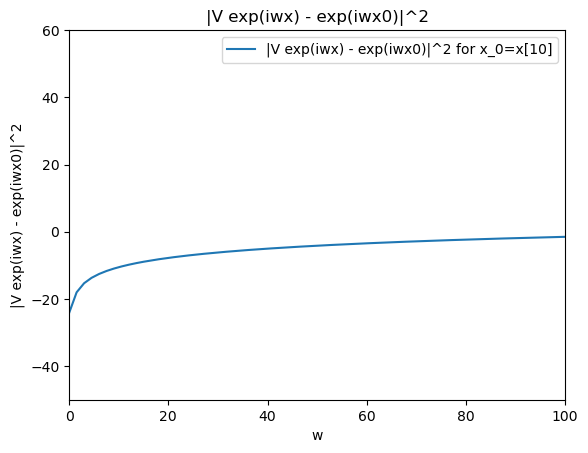

39669.01111269466
10


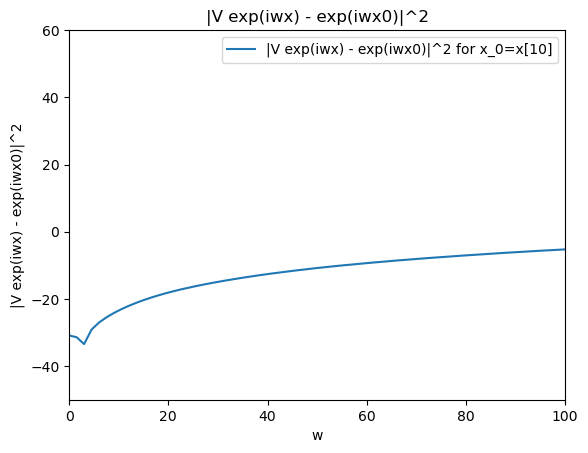

In [7]:
test2(cov_index=0,j=10, x_min=0, x_max=1, theta=4, range_val = 3, n=100)
test2(cov_index=1,j=10, x_min=0, x_max=1, theta=4, range_val = 3, n=100)

# if x_max = 1 , n=200, might have numerical issue  make x distance 0.05 or 0.01 if 0.005 we may have a problem 


Sanity check on a spectral density: fourier transform of covariance function.

c:\Users\joonw\anaconda3\envs\msds534\lib\site-packages\scipy\integrate\_quadpack_py.py:577: ComplexWarning: Casting complex values to real discards the imaginary part
  return _quadpack._qagse(func,a,b,args,full_output,epsabs,epsrel,limit)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_34464\199382647.py:15: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  result, _ = quad(integrand, 0, 120)


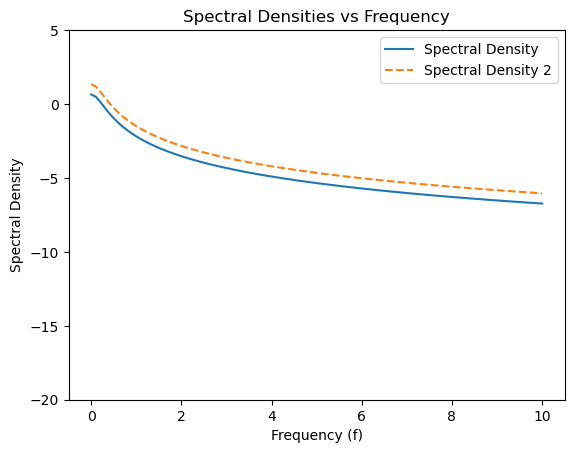

In [8]:
n = 200
x_min = 0
x_max = 100
theta = 3
range_val = 4

x = np.linspace(x_min, x_max, n)
d = np.sqrt((x[:, None] - x)**2)

def covariance_function(d):
    return theta * np.exp(-d / range_val)

def spectral_density(w):
    integrand = lambda d: 1/(2*np.pi) * covariance_function(d) * np.exp(-1j * w * d)
    result, _ = quad(integrand, 0, 120)
    return np.log(np.real(result))

def spectral_density2(w):
    out = theta/(2*np.pi) * 2*range_val/(1+range_val**2*w**2)
    return np.log(out)

# Example usage
frequency_values = np.linspace(0, 10, 100)
spectral_density_values = [spectral_density(w) for w in frequency_values]
spectral_density2_values = [spectral_density2(w) for w in frequency_values]

# Plot both spectral densities on the same plot
plt.plot(frequency_values, spectral_density_values, label='Spectral Density')
plt.plot(frequency_values, spectral_density2_values, label='Spectral Density 2', linestyle='--')  # Using dashed line for the second spectral density

plt.xlabel('Frequency (f)')
plt.ylabel('Spectral Density')
plt.title('Spectral Densities vs Frequency')
plt.ylim(-20, 5)
plt.legend()
plt.show()

Sanity check for covariance function: inverse fourier transform 

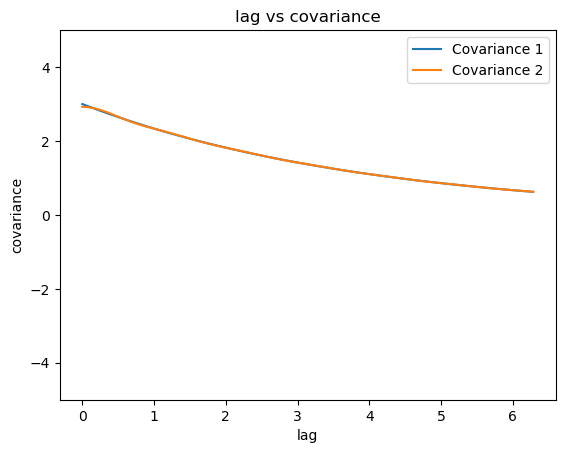

In [9]:
import numpy as np
from scipy.integrate import quad

# Parameters
theta = 3
range_val = 4

d_values = np.linspace(0,2*np.pi)

def covariance_function(d):
    return theta * np.exp(-d/range_val)

def covariance_function2(d):
    # out = 3/(2*np.pi) * 2*4/(1 + 4**2*w**2)
    integrand =  lambda w: 3/(2*np.pi) * 2*4/(1 + 4**2*w**2) *np.exp(1j *  w * d)
    bb = 1
    result, _ = quad(integrand, -2*np.pi/bb, 2*np.pi/bb)
    return np.real(result)

# Generate values for d
d_values = np.linspace(0, 2*np.pi, 100)

# Calculate covariance values for both functions
density_values = [covariance_function(d) for d in d_values]
density_values2 = [covariance_function2(d) for d in d_values]

# Plot the spectral densities
plt.plot(d_values, density_values, label='Covariance 1')
plt.plot(d_values, density_values2, label='Covariance 2')
plt.xlabel('lag')
plt.ylabel('covariance')
plt.title('lag vs covariance')
plt.ylim(-5, 5)
plt.legend()  # Add a legend to differentiate between the two functions
plt.show()

## Exercise 5-3: variance on [-T,T].

The reason why we observe the difference at the first x[0]  and last x[n-1] for exponential kernel is that it is a markov process. For the first and last, they are affected by single element and the rest affected by neighbor 2.

If the kernel is matern with smoother parameter 3/2, then we expect to see more horseshoe shape. 

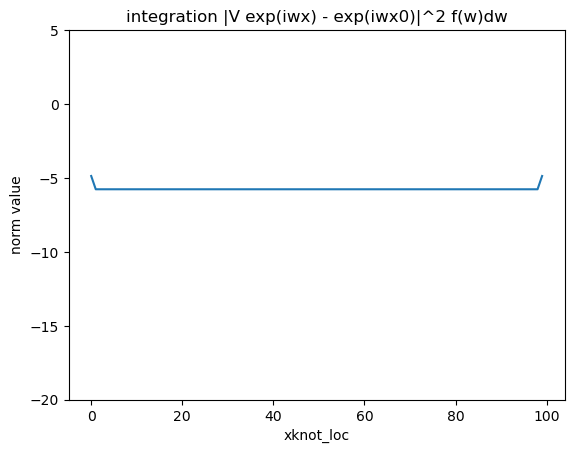

In [10]:
class Mytest2: 
    def __init__(self,x_min=0, x_max=100, n=500,
            theta=3, range_val=4):
        self.x_min = x_min
        self.x_max = x_max
        self.n = n
        self.theta = theta
        self.range_val = range_val
            
    # Generate a regular grid using linspace
    def generate_grid(self,x_min,x_max, n):
        x = np.linspace(x_min, x_max, n)
        d = d = np.sqrt( (x[:, None] - x)**2 ) 
        return x, d 
    
    def covariance_function(self,d):
        return self.theta * np.exp(-d/self.range_val)
    
    def spectral_density(self,w):
         return self.theta * (1 / (2 * np.pi)) * (2 * self.range_val / (1 + self.range_val**2 * w**2))
    
    def blp(self,w):
        return np.dot(self.coef.T, np.exp(1j * np.outer(self.x[self.lin_coef], w)))

    def generate_norm(self, xknot_loc):
        lin_coef = list(range(0, xknot_loc)) + list(range((xknot_loc+1), self.n))
        lin_coef = np.array(lin_coef)
        lin_coef2 = list(range(xknot_loc,0,-1)) + list(range(1, (self.n-xknot_loc)))
        lin_coef2

        self.lin_coef = lin_coef
        self.lin_coef2 = lin_coef2

        x,d = self.generate_grid(self.x_min, self.x_max, self.n)
        self.x = x
        self.d = d
        cov_mat = self.covariance_function(d)
        sub_mat = cov_mat[np.ix_( lin_coef, lin_coef  )]
        inv_mat = np.linalg.inv(sub_mat)
        coef = np.dot(inv_mat, cov_mat[0, lin_coef2])
        coef = np.array(coef)
        self.coef = coef

        bb = 1
        integrand = lambda w: np.abs(self.blp(w) - np.exp(1j * w* x[xknot_loc]))**2 *self.spectral_density(w)
        result, _ = quad(integrand, -3*100/bb, 3*100/bb)
        return np.log(np.real(result))
    
    def run_simulation(self):
        xknot_locs = list(range(self.n))
        norm_values = [self.generate_norm(xknot_loc) for xknot_loc in xknot_locs]
        plt.plot(xknot_locs, norm_values, label=f' integration |V exp(iwx) - exp(iwx0)|^2 f(w)dw ')
        plt.xlabel('xknot_loc')
        plt.ylabel('norm value')
        plt.title('integration |V exp(iwx) - exp(iwx0)|^2 f(w)dw')
        plt.ylim(-20, 5)
        plt.show()

simulator = Mytest2(x_min=0, x_max=1, 
                        n=100, theta=1, range_val=2)

#simulator.generate_norm(100)
simulator.run_simulation()
# simulator.run_simulation()


Observe that if the kernel is matern with smoother parameter 3/2, then we expect to see more horseshoe shape. 

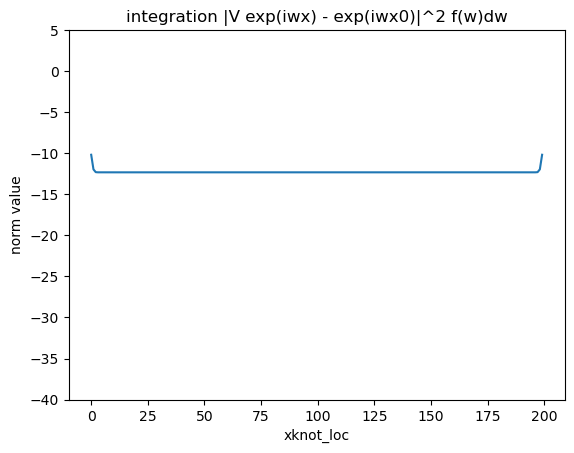

In [13]:
class Mytest2_2: 
    def __init__(self,x_min=0, x_max=1, n=100, bb=1,
            theta=3, range_val=4):
        self.x_min = x_min
        self.x_max = x_max
        self.n = n
        self.theta = theta
        self.range_val = range_val
        self.bb = bb
            
    # Generate a regular grid using linspace
    def generate_grid(self,x_min,x_max, n):
        x = np.linspace(x_min, x_max, n)
        d = d = np.sqrt( (x[:, None] - x)**2 ) 
        return x, d 
    
    def covariance_function(self,d):
        return self.theta * (1 + d/self.range_val) * np.exp(-d/self.range_val)
        # return self.theta * np.exp(-d/self.range_val)
    
    def spectral_density(self,w):
        # return self.theta * (1 / (2 * np.pi)) * (2 * self.range_val / (1 + self.range_val**2 * w**2))
        return self.theta * (1 / (2 * np.pi)) * (4* self.range_val / (1 + self.range_val**2 * w**2)**2 )
    
    def blp(self,w):
        return np.dot(self.coef.T, np.exp(1j * np.outer(self.x[self.lin_coef], w)))

    def generate_norm(self, xknot_loc):
        lin_coef = list(range(0, xknot_loc)) + list(range((xknot_loc+1), self.n))
        lin_coef = np.array(lin_coef)
        lin_coef2 = list(range(xknot_loc,0,-1)) + list(range(1, (self.n-xknot_loc)))
        lin_coef2

        self.lin_coef = lin_coef
        self.lin_coef2 = lin_coef2

        x,d = self.generate_grid(self.x_min, self.x_max, self.n)
        self.x = x
        self.d = d
        cov_mat = self.covariance_function(d)
        sub_mat = cov_mat[np.ix_( lin_coef, lin_coef  )]
        inv_mat = np.linalg.inv(sub_mat)
        coef = np.dot(inv_mat, cov_mat[0, lin_coef2])
        coef = np.array(coef)
        self.coef = coef

        
        integrand = lambda w: np.abs(self.blp(w) - np.exp(1j * w* x[xknot_loc]))**2 *self.spectral_density(w)
        result, _ = quad(integrand, -2*100/self.bb, 2*100/self.bb)
        return np.log(np.real(result))
    
    def run_simulation(self):
        xknot_locs = list(range(self.n))
        # print(xknot_locs)
        norm_values = [self.generate_norm(xknot_loc) for xknot_loc in xknot_locs]
        plt.plot(xknot_locs, norm_values, label=f' integration |V exp(iwx) - exp(iwx0)|^2 f(w)dw ')
        plt.xlabel('xknot_loc')
        plt.ylabel('norm value')
        plt.title('integration |V exp(iwx) - exp(iwx0)|^2 f(w)dw')
        plt.ylim(-40, 5)
        plt.show()

simulator = Mytest2_2(x_min=0, x_max=10, bb=1,
                        n=200, theta=1, range_val=2)

#simulator.generate_norm(100)
simulator.run_simulation()
# simulator.run_simulation()

We are controling the integration range [-T/bb, T/bb] by bb. 

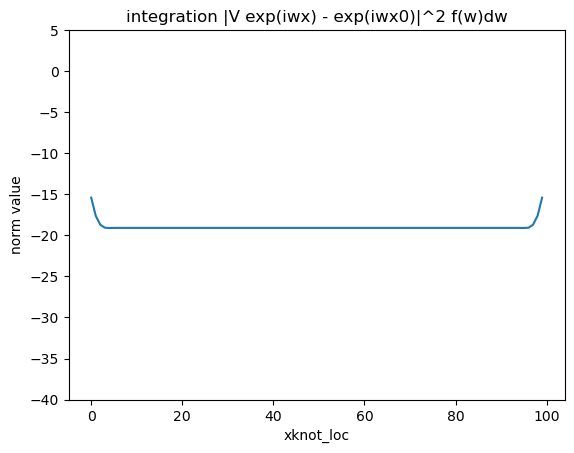

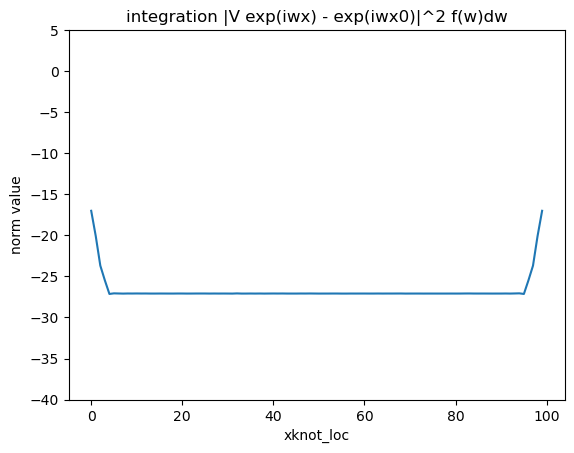

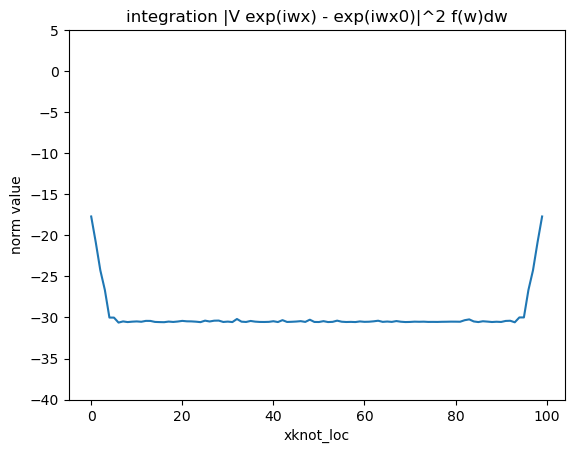

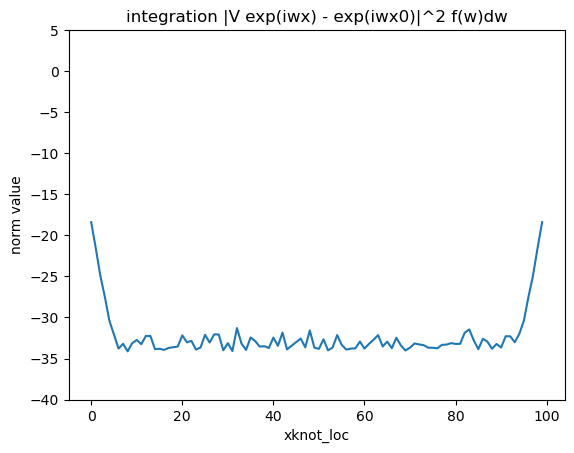

In [14]:
simulator = Mytest2_2(x_min=0, x_max=1, bb=1,
                        n=100, theta=1, range_val=2)
simulator.run_simulation()
simulator = Mytest2_2(x_min=0, x_max=1, bb=5,
                        n=100, theta=1, range_val=2)
simulator.run_simulation()
simulator = Mytest2_2(x_min=0, x_max=1, bb=10,
                        n=100, theta=1, range_val=2)
simulator.run_simulation()
simulator = Mytest2_2(x_min=0, x_max=1, bb=20,
                        n=100, theta=1, range_val=2)
simulator.run_simulation()

Plot  (x=frequency, y=prediction error * spectral density)

In [244]:
def test3(cov_index=0,j=100, x_min=0, x_max=10, theta=4, range_val = 3, n=200):

    # Specify the number of points along each axis
    # num_points_x, num_points_y = n, n
    num_points_x = n

    # Generate a regular grid using linspace
    x = np.linspace(x_min, x_max, num_points_x) 
    d = np.sqrt( (x[:, None] - x)**2 )  

    # Covariance matrices
    cov_mat1 = theta * np.exp(-d/range_val)
    cov_mat2 = theta * (1 + d/range_val) * np.exp(-d/range_val)
    cov_mat3 = theta * np.exp( -(d/range_val)**2)

    cov_list = [cov_mat1, cov_mat2, cov_mat3]

    # np.random.seed(42)
    # sim_data = multivariate_normal(mean=np.zeros(n), cov=cov_list[cov_index]).rvs()
    # example1) estiamte Z_0 using Z_1,..., Z_n

    lin_coef = list(range(0, j)) + list(range((j+1), n))
    lin_coef = np.array(lin_coef)
    
    lin_coef2 = list(range(j,0,-1)) + list(range(1, (n-j)))
    lin_coef2

    cov_mat = cov_list[cov_index]

    print(np.sum(cov_mat))
    
    sub_mat = cov_mat[np.ix_( lin_coef, lin_coef  )]
    inv_mat = np.linalg.inv(sub_mat)
    coef = np.dot(inv_mat, cov_mat[0, lin_coef2])
    coef = np.array(coef)

    # Generate a range of frequencies (w values)
    w_values = np.linspace(0, 2 * np.pi, num=n)
                # Calculate the squared absolute value of V exp(iwx)
    tmp = np.exp(1j * np.outer(x[lin_coef], w_values))  # 1j represents the imaginary unit (sqrt(-1)).
    out = np.abs(np.dot(coef.T, tmp) - np.exp(1j * w_values * x[j]))**2
    out = out * theta * (1 / (2 * np.pi)) * (2 * range_val / (1 + range_val**2 * w_values**2))

    print(j)

    out = np.log(out)
    #out_truncated = np.where(out < 1e-4, 1e-4, out)

    #logout = (out_truncated)
    # Plot the result
    plt.plot(w_values, out, label=f'|V exp(iwx) - exp(iwx0)|^2 *f(w) for x_0=x[{j}]')

    plt.xlabel('w')
    plt.ylabel('|V exp(iwx) - exp(iwx0)|^2')
    plt.title(f'|V exp(iwx) - exp(iwx0)|^2')
    plt.legend()
    plt.xlim(0, 10)
    plt.ylim(-50, 60)  # Set y-axis limits
    plt.show()


# 

# 